# # Préparation des données # #


On a commencé tout d'abord par apporté les deux bibliothéques adéquates. 
Ensuite on a converti le fichier "chronic kidney disease.arff" en fichier “csv result-chronic kidney disease.csv”.
Et par la suite, on a importé le fichier dans notre notebook.


In [11]:
import numpy as np
import pandas as pd
data=pd.read_csv('csv_result-chronic_kidney_disease.csv',on_bad_lines='skip')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      397 non-null    int64 
 1   age     397 non-null    object
 2   bp      397 non-null    object
 3   sg      397 non-null    object
 4   al      397 non-null    object
 5   su      397 non-null    object
 6   rbc     397 non-null    object
 7   pc      397 non-null    object
 8   pcc     397 non-null    object
 9   ba      397 non-null    object
 10  bgr     397 non-null    object
 11  bu      397 non-null    object
 12  sc      397 non-null    object
 13  sod     397 non-null    object
 14  pot     397 non-null    object
 15  hemo    397 non-null    object
 16  pcv     397 non-null    object
 17  wbcc    397 non-null    object
 18  rbcc    397 non-null    object
 19  htn     397 non-null    object
 20  dm      397 non-null    object
 21  cad     397 non-null    object
 22  appet   397 non-null    ob

 # # Transformation des données # #

Afin d’assurer le bon déroulement de la préparation de données , on a divisé notre dataset en 2 catégories : numériques et objet .
Commençant en premier lieu par les donnees numériques.


In [13]:
numeric = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
for item in numeric:
    data[item] = pd.to_numeric(data[item], errors='coerce')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      397 non-null    int64  
 1   age     388 non-null    float64
 2   bp      385 non-null    float64
 3   sg      350 non-null    float64
 4   al      351 non-null    float64
 5   su      348 non-null    float64
 6   rbc     397 non-null    object 
 7   pc      397 non-null    object 
 8   pcc     397 non-null    object 
 9   ba      397 non-null    object 
 10  bgr     354 non-null    float64
 11  bu      378 non-null    float64
 12  sc      380 non-null    float64
 13  sod     312 non-null    float64
 14  pot     311 non-null    float64
 15  hemo    345 non-null    float64
 16  pcv     327 non-null    float64
 17  wbcc    292 non-null    float64
 18  rbcc    267 non-null    float64
 19  htn     397 non-null    object 
 20  dm      397 non-null    object 
 21  cad     397 non-null    object 
 22  ap

 On a remarqué que notre dataset comporte des points d'interrogation, donc on a décidé de les remplacer par des valeurs (NAN) pour qu'on puisse exploiter convenablement notre dataframe .

In [5]:
for column in data.columns:
        data[column] = data[column].replace(['?'], np.nan)
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


Aprés avoir changer le contenu des champs ayant des point d'interrogation , on va effectuer maintenant le traitement nécessaire pour modifier les valeurs nan par la moyenne comme indiqué dans l'article scientifique ci-dessous :


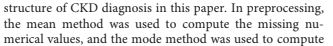


C'est pour cela qu'on a fait une selection sur les attributs float afin d'apporter les changement.

In [6]:
dtype_float=data.select_dtypes(include=['float64'])
dtype_float.head()
dtype_float=dtype_float.fillna(dtype_float.mean())
dtype_float.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.508013,4.630868,15.4,44.0,7800.0,5.200000
1,7.0,50.0,1.020,4.0,0.0,147.864407,18.0,0.8,137.508013,4.630868,11.3,38.0,6000.0,4.702247
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.508013,4.630868,9.6,31.0,7500.0,4.702247
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.508013,4.630868,11.6,35.0,7300.0,4.600000



Comme vous voyez dans le tableau ci-dessus ,les champs qui ont été occupés par la valeur nan contiennent maintenant la moyenne de type float.
Prenant l'exemple de la deuxième valeur de l'attribut "rbcc". Cette valeur a changé de NAN à 4.7.


Se concentrant maintenant sur les attributs de type objet , on va faire presque le même traitement que celui sur les valeurs numériques sauf qu'on va changer les valeur nan par le mode comme indiquer dans l'extrait de l'article ci-dessous:




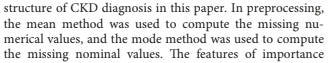

c'est pour cela ,on a fait une selection sur les attributs objet afin d'apporter les changement.


In [7]:
for x in data.select_dtypes(include=['object']):
    print("{} unique values:".format(x),data[x].unique())
    print("-"*50)

rbc unique values: [nan 'normal' 'abnormal']
--------------------------------------------------
pc unique values: ['normal' 'abnormal' nan]
--------------------------------------------------
pcc unique values: ['notpresent' 'present' nan]
--------------------------------------------------
ba unique values: ['notpresent' 'present' nan]
--------------------------------------------------
htn unique values: ['yes' 'no' nan]
--------------------------------------------------
dm unique values: ['yes' 'no' nan]
--------------------------------------------------
cad unique values: ['no' 'yes' nan]
--------------------------------------------------
appet unique values: ['good' 'poor' nan]
--------------------------------------------------
pe unique values: ['no' 'yes' nan]
--------------------------------------------------
ane unique values: ['no' 'yes' nan]
--------------------------------------------------
class unique values: ['ckd' 'notckd']
-------------------------------------------------

In [8]:
dtype_object=data.select_dtypes(include=['object'])
dtype_object.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [9]:
dtype_object=data.select_dtypes(include=['object'])
for col in dtype_object:
        dtype_object[col].fillna(dtype_object[col].mode()[0], inplace=True)

In [10]:
dtype_object=data.select_dtypes(include=['object'])
dtype_object.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


Comme vous voyez dans le tableau ci-dessus ,les champs qui ont été occupés par la valeur nan contiennent maintenant le mode de type objet . prenant l'exemple de la première valeur de l'attribut "rbc". Cette valeur a changé de nan à normal .



pour vérifier qu'il n ya plus de valeur nan dans le tableau , on a effectuer la commande ci-dessous .

In [11]:
for x in data.select_dtypes(include=['object']):
    print("{} unique values:".format(x),data[x].unique())
    print("-"*50)

rbc unique values: ['normal' 'abnormal']
--------------------------------------------------
pc unique values: ['normal' 'abnormal']
--------------------------------------------------
pcc unique values: ['notpresent' 'present']
--------------------------------------------------
ba unique values: ['notpresent' 'present']
--------------------------------------------------
htn unique values: ['yes' 'no']
--------------------------------------------------
dm unique values: ['yes' 'no']
--------------------------------------------------
cad unique values: ['no' 'yes']
--------------------------------------------------
appet unique values: ['good' 'poor']
--------------------------------------------------
pe unique values: ['no' 'yes']
--------------------------------------------------
ane unique values: ['no' 'yes']
--------------------------------------------------
class unique values: ['ckd' 'notckd']
--------------------------------------------------


Afin de déterminer les different valeur de chaque attribut ,on a fait appel à la visualition des colonnes catégorielles par un diagramme à baton.

C:\Users\Sirine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sirine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sirine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sirine\anaconda3\li

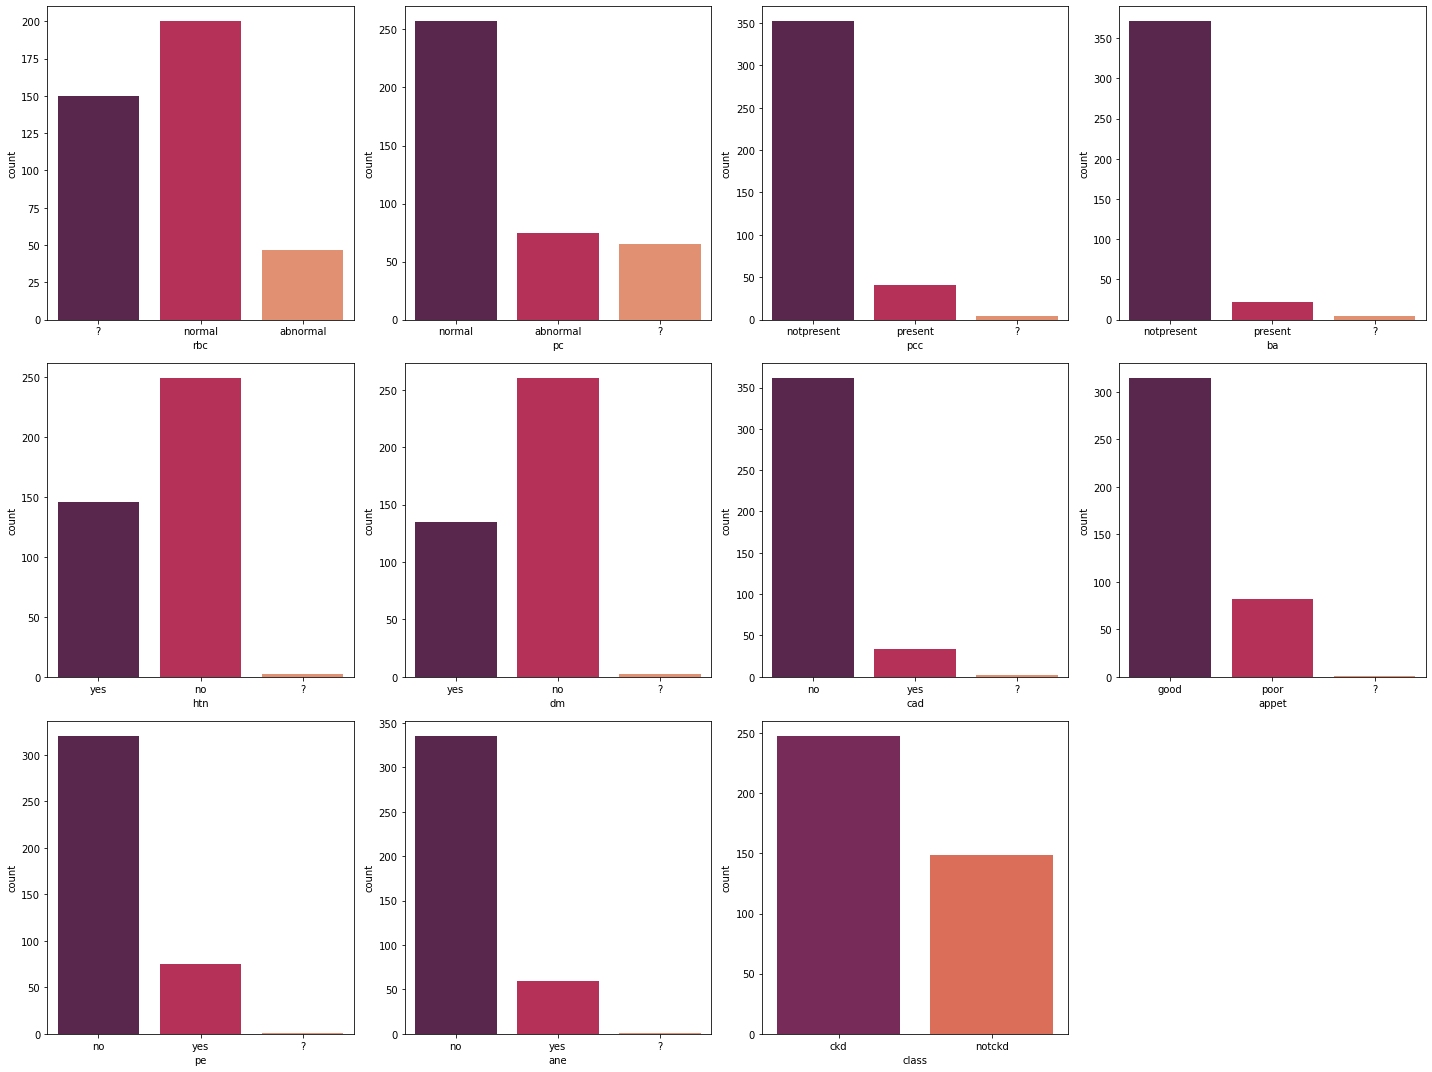

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in dtype_object:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

A ce niveau , on va concater les deux parties de notre dataset (objet et float) aprés les modification apporté .

In [13]:
data= pd.concat([dtype_float,dtype_object], axis=1)

Comme vous voyez si dessous , on a obtenu une dataset avec tout les attribut 

In [14]:
data.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.508013,4.630868,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,147.864407,18.0,0.8,137.508013,4.630868,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.508013,4.630868,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.508013,4.630868,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


On va appliquer directement la méthode get dummies sur le dataframe car son algorithme à l'intérieur reconnaîtra les caractéristiques catégorielles et effectuera les conversions nécessaires.

In [15]:
data = pd.get_dummies(data, prefix_sep='_', drop_first=True)

In [16]:
data.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.508013,4.630868,...,1,0,0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,147.864407,18.0,0.8,137.508013,4.630868,...,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.508013,4.630868,...,1,0,0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,0,1,0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.508013,4.630868,...,1,0,0,0,0,0,0,0,0,0


comme vous voyez dans le tableau ci-dessus ,les champs qui ont été occupé par des valeurs catégorielles contiennent maintenant des valeurs binaire . 

In [17]:
data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,...,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,51.456186,76.467532,1.017429,1.017094,0.433908,147.864407,57.608995,3.088289,137.508013,4.630868,...,0.811083,0.103275,0.055416,0.367758,0.340050,0.085642,0.206549,0.188917,0.151134,0.375315
std,16.938112,13.502323,0.005374,1.271182,1.009400,74.861716,49.421022,5.635975,9.233329,2.829875,...,0.391937,0.304701,0.229078,0.482804,0.474324,0.280188,0.405340,0.391937,0.358631,0.484815
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,80.000000,1.017429,1.000000,0.000000,125.000000,44.000000,1.400000,137.508013,4.630868,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.000000,0.433908,150.000000,64.000000,3.088289,141.000000,4.800000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# # Visualise the outliers using the boxplot representation # #


A ce niveau là,on va étudier les valeurs aberrantes s'ils existent .

Pour cela on a employé deux type de visualisation: le boxplot et le histogramme.

# les valeurs aberrantes d'age 

C:\Users\lasmer brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


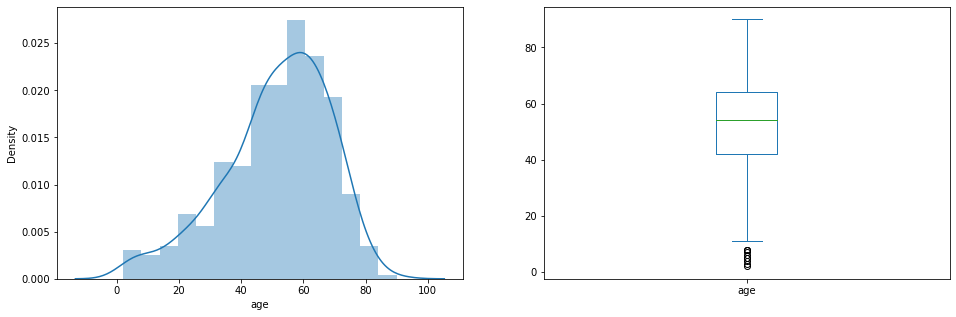

In [18]:
plt.subplot(121), sns.distplot(data['age'])
plt.subplot(122), data['age'].plot.box(figsize=(16,5))
plt.show()

On se basant sur les diagramme en dessus ,on peut voir qu'il existe des valeurs aberrantes au dessous du  borne inférieure du boxplot .

# les valeurs aberrantes de bp 

C:\Users\lasmer brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


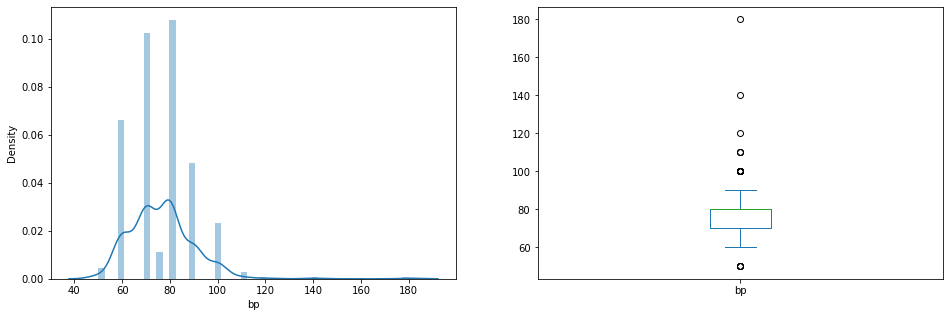

In [19]:
plt.subplot(121), sns.distplot(data['bp'])
plt.subplot(122), data['bp'].plot.box(figsize=(16,5))
plt.show()

On se basant sur les diagramme en dessus ,on peut voir  clairement qu'il existe des valeurs aberrantes au dessous du  borne inférieure et au dessus du borne supérieure du boxplot .

# les valeurs aberrantes de bgr

C:\Users\lasmer brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


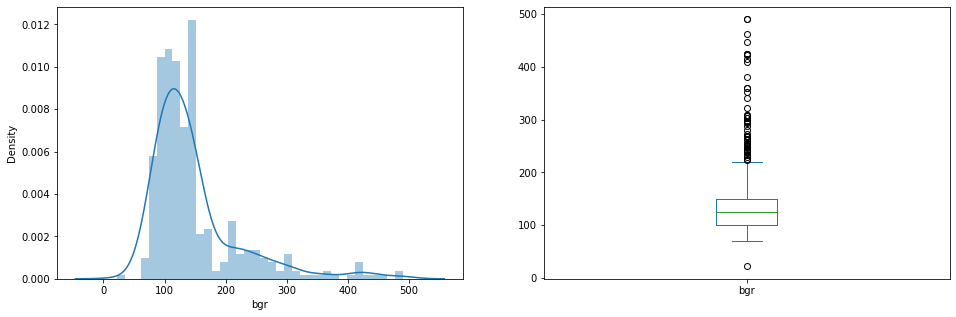

In [20]:
plt.subplot(121), sns.distplot(data['bgr'])
plt.subplot(122), data['bgr'].plot.box(figsize=(16,5))
plt.show()

On se basant sur les diagramme en dessus ,on peut voir  clairement qu'il existe des valeurs aberrantes au dessous du  borne inférieure et au dessus du borne supérieure du boxplot .

# les valeurs aberrantes de sg

C:\Users\lasmer brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


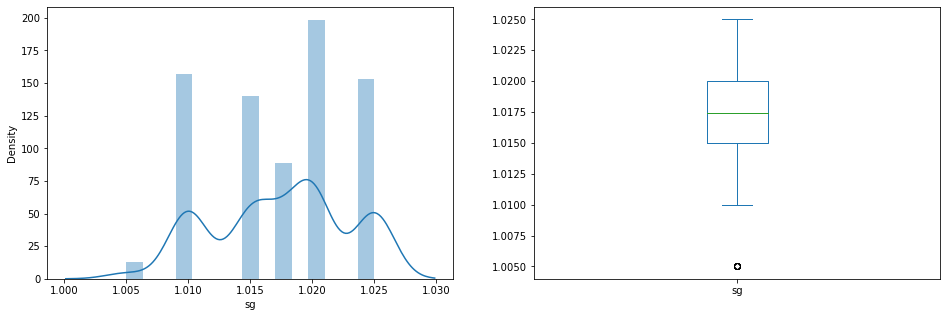

In [21]:
plt.subplot(121), sns.distplot(data['sg'])
plt.subplot(122), data['sg'].plot.box(figsize=(16,5))
plt.show()

On se basant sur les diagramme en dessus ,on peut voir qu'il existe des valeurs aberrantes au dessous du  borne inférieure du boxplot .


# les valeurs aberrantes de su

C:\Users\lasmer brahim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


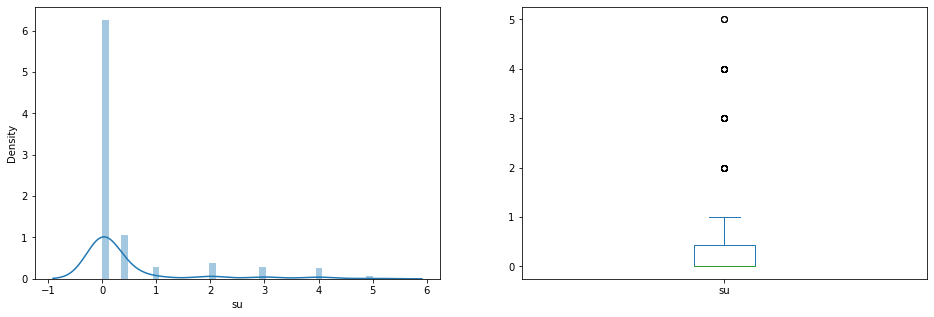

In [22]:
plt.subplot(121), sns.distplot(data['su'])
plt.subplot(122), data['su'].plot.box(figsize=(16,5))
plt.show()

On se basant sur les diagramme en dessus ,on peut voir qu'il existe des valeurs aberrantes au dessus du  borne inférieure du boxplot .

a ce niveau ,on va faire la vérification de la distribution des caractéristiques numériques

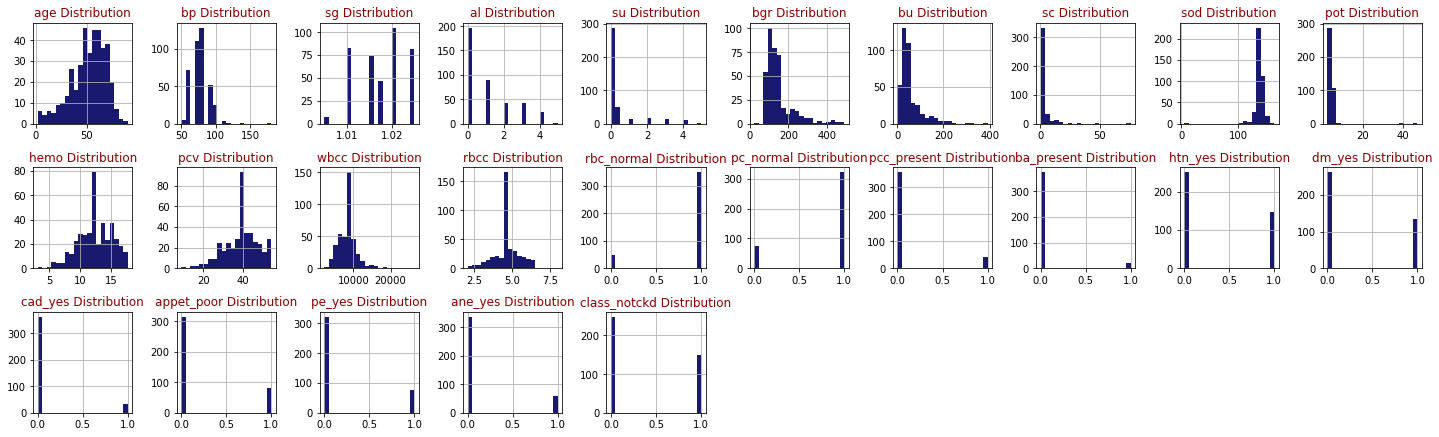

In [23]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,10,10)

# # traitement des valeurs aberrantes # #

Puisque la taille  de la base de données est négligeable et vu qu'il ya seulement 400 observations et que le nombre des valeurs aberrantes  
est tres important ,on a décidé de remplacer ces valeurs par la moyenne de chaque colonne

In [24]:
#numeric_cols = data.columns[data.dtypes=="float64"].tolist()
#print('number of outliers for each column')
#for col in numeric_cols:
  #  Q1 = data[col].quantile(0.25) #Q1 is the first quartile
  #  Q3 = data[col].quantile(0.75) #Q3 is the third quartile
  #  IQR = Q3 - Q1    #IQR is the interquartile range. 
  #  filter = (data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 *IQR)
  #  print(col, data[col][filter].count())
  #  data[col]= data[col].replace(data[col][filter].values,np.nan)

In [25]:
data.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.508013,4.630868,...,1,0,0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,147.864407,18.0,0.8,137.508013,4.630868,...,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.508013,4.630868,...,1,0,0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,0,1,0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.508013,4.630868,...,1,0,0,0,0,0,0,0,0,0


Pour remplacer les données NA , nous utiliserons le changement  par la moyenne pour les valeurs quantitatives .

In [26]:
numeric_cols = data.columns[data.dtypes=="float64"].tolist()
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())
data.head(35)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd
0,48.000000,80.000000,1.020000,1.000000,0.000000,121.000000,36.000000,1.200000,137.508013,4.630868,...,1,0,0,1,1,0,0,0,0,0
1,7.000000,50.000000,1.020000,4.000000,0.000000,147.864407,18.000000,0.800000,137.508013,4.630868,...,1,0,0,0,0,0,0,0,0,0
2,62.000000,80.000000,1.010000,2.000000,3.000000,423.000000,53.000000,1.800000,137.508013,4.630868,...,1,0,0,0,1,0,1,0,1,0
3,48.000000,70.000000,1.005000,4.000000,0.000000,117.000000,56.000000,3.800000,111.000000,2.500000,...,0,1,0,1,0,0,1,1,1,0
4,51.000000,80.000000,1.010000,2.000000,0.000000,106.000000,26.000000,1.400000,137.508013,4.630868,...,1,0,0,0,0,0,0,0,0,0
5,60.000000,90.000000,1.015000,3.000000,0.000000,74.000000,25.000000,1.100000,142.000000,3.200000,...,1,0,0,1,1,0,0,1,0,0
6,68.000000,70.000000,1.010000,0.000000,0.000000,100.000000,54.000000,24.000000,104.000000,4.000000,...,1,0,0,0,0,0,0,0,0,0
7,24.000000,76.467532,1.015000,2.000000,4.000000,410.000000,31.000000,1.100000,137.508013,4.630868,...,0,0,0,0,1,0,0,1,0,0
8,52.000000,100.000000,1.015000,3.000000,0.000000,138.000000,60.000000,1.900000,137.508013,4.630868,...,0,1,0,1,1,0,0,0,1,0
9,53.000000,90.000000,1.020000,2.000000,0.000000,70.000000,107.000000,7.200000,114.000000,3.700000,...,0,1,0,1,1,0,1,0,1,0


In [27]:
data.rename(columns = {'class_notckd':'class'}, inplace = True)
data.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.508013,4.630868,...,1,0,0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,147.864407,18.0,0.8,137.508013,4.630868,...,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.508013,4.630868,...,1,0,0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,0,1,0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.508013,4.630868,...,1,0,0,0,0,0,0,0,0,0


Le bout de code qui suit conçu pour l'exportation du dataset pour le dashboard sur powerBI.

In [28]:
data.to_csv(r'C:\Users\lasmer brahim\Desktop\data.csv', index=False, header=True)


# # Classification # #

Par curiosité, on a voulu savoir le nombre des personnes qui souffre du “chronic kidney disease” . on peut voir que notre dataset est en déséquilibre .

In [29]:
data['class'].value_counts()

0    248
1    149
Name: class, dtype: int64

<AxesSubplot:title={'center':'Count of Diagnosis of kidney disease'}>

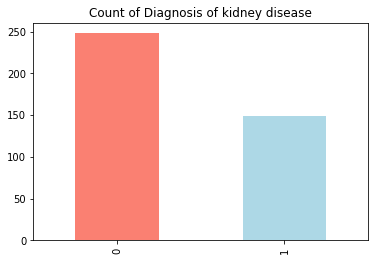

In [30]:
data['class'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease")


# # features selection # #

# SelectKBest  #

on a débuter la sélection du meilleur features .

In [31]:
X = data.drop("class", axis=1)
y = data["class"]

A ce niveau la, on va diviser notre dataset en 2 partie 20% test et 80%train

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(317, 24)
(80, 24)


On va appliquer la méthode selectkbest afin d'extracter les meilleur features selon le score le plus élevé.
vu qu'on a pris la valeur k=17 on a obtenu 17 valeurs sélectionnées et 7 valeurs supprimées.

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif      
from sklearn.feature_selection import f_regression  
#Score function: test de dependance
#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif 

kbest = SelectKBest(score_func=f_regression, k=17)
kbest.fit(X_train, y_train)
print("Sélection de variables :", kbest.get_support())
print("Scores de variables :", kbest.scores_)
print("Variables sélectionnées:", list(X.columns[kbest.get_support()]))
print("Variables supprimées :", list(X.columns[~kbest.get_support()]))

Sélection de variables : [False False  True  True  True  True  True  True  True False  True  True
 False  True  True  True False False  True  True False  True  True  True]
Scores de variables : [ 17.63865183  26.06421957 295.95949569 179.43048496  40.85684304
  64.30471456  47.31447232  27.17344892  39.78357047   1.94749298
 349.72574549 301.65466913  11.87765688 163.74145674  27.84850058
  53.41640379  21.4817895   10.24223252 181.76898811 144.19682416
  18.91561514  67.46763407  53.41640379  39.0784137 ]
Variables sélectionnées: ['sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'hemo', 'pcv', 'rbcc', 'rbc_normal', 'pc_normal', 'htn_yes', 'dm_yes', 'appet_poor', 'pe_yes', 'ane_yes']
Variables supprimées : ['age', 'bp', 'pot', 'wbcc', 'pcc_present', 'ba_present', 'cad_yes']


In [ ]:
A ce niveau la , on a calculé le score obtenu par la methode de k-best.

In [34]:
from sklearn.linear_model import LinearRegression
X_train = kbest.transform(X_train)
X_test = kbest.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('test_score = ',model.score(X_test,y_test)) 

test_score =  0.7057273258991849


 # Recursive Feature Elimination (RFE) #

In [ ]:
On a appliquer le même démarche que la méthode rfe et on a obtenu un résultat différent.

In [35]:
X = data.drop("class", axis=1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=17)
rfe.fit(X_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)
print("Variables sélectionnées :", list(X.columns[rfe.support_]))

Sélection de variables [False False  True  True  True False False  True  True False  True  True
 False False  True  True  True  True  True  True  True  True  True  True]
Classement de variables [7 4 1 1 1 6 5 1 1 3 1 1 8 2 1 1 1 1 1 1 1 1 1 1]
Variables sélectionnées : ['sg', 'al', 'su', 'sc', 'sod', 'hemo', 'pcv', 'rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes']


In [37]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print('test_score = ',model.score(X_test,y_test)) 

test_score =  0.719948036746657


d'apres les resultat désiré par l'article 1, on voit que le résultat obtenu par k-best est meilleur que celui de RFE .
k-best 2 valeurs erronnées alors que par la methode RFE 5 valeurs erronée .

# elimination #

A ce niveau la , on a éliminer les colonnes supprimée par la méthode de k-best.

In [38]:
data = data.drop(X.columns[~kbest.get_support()],axis=1)

# SVM #

on a diviser notre dataset en 2 partie , une dataset comportant seulement la colonne cible et une dataset comportant le reste du dataset et on va diviser notre dataset en 2 partie 20% test et 80%train.

In [39]:
from sklearn.model_selection import train_test_split
X =  data.drop(['class'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

On a commencé par svm rbf et on a affiché le rapport de classification relative.

In [41]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        47
           1       0.96      0.76      0.85        33

    accuracy                           0.89        80
   macro avg       0.91      0.87      0.88        80
weighted avg       0.90      0.89      0.88        80



In [ ]:
en deuxieme lieu , svm lineaire et on a affiché le rapport de classification relative.

In [42]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(X_test)
print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [ ]:
en troisieme lieu , svm poly et on a affiché le rapport de classification relative.

In [43]:
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_3 = svm.predict(X_test)
print(classification_report(y_pred_svc_3, y_test))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        44
           1       0.96      0.69      0.81        36

    accuracy                           0.85        80
   macro avg       0.88      0.84      0.84        80
weighted avg       0.87      0.85      0.85        80



In [ ]:
finalement, svm sigmoid et on a affiché le rapport de classification relative.

In [44]:
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(X_test)
print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70        55
           1       0.35      0.36      0.35        25

    accuracy                           0.59        80
   macro avg       0.52      0.53      0.53        80
weighted avg       0.59      0.59      0.59        80



afin de déterminer le meilleur svm , on a appliquer  le GridSearch.
on a commence par la détermination des paramétres.

In [45]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','sigmoid','poly','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True) 
# fitting the model for grid search 
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear']})

par l'intermédiaire des paramétres obtenu , on a déterminer le best svm (lineaire). 

In [47]:
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid.best_params_)

Meilleurs paramétres trouvés par GridSeachCV
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


on a appliqué les paramétres obtenu par le GridSearch.

In [48]:
svm = SVC(C=0.1, gamma=1, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

on a réaliser la prédiction et on a afficher le rapport de classification .

In [49]:
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.93      1.00      0.96        26

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)
models = pd.DataFrame({
    'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
              'Support Vector Machines sigmoïde'],
    'Score': [s1,s2, s3, 
              s4]})
models.sort_values(by="Score",ascending=False)

,Model,Score
1,Support Vector Machines Linaire,0.9750
0,Support Vector Machines RBF,0.8875
2,Support Vector Machines polynomiale,0.8500
3,Support Vector Machines sigmoïde,0.5875


# KNN #

In [51]:
X =  data.drop(['class'], axis=1)
y = data['class']
#Diviser les données (80% Apprentissage et 20% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 4


In [54]:
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 1, 'n_neighbors': 4, 'p': 2}


In [55]:
#Taux de bonne classification
best_result = clf.best_score_
print(best_result)

0.9967741935483871


In [56]:
knn = KNeighborsClassifier(4,p=2,leaf_size=1 )
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# naive bayes #

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
pred_naive_bayes = classifier.predict(X_test)
print(classification_report(y_test, pred_naive_bayes))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.93      1.00      0.96        26

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)
s5=accuracy_score(y_test, y_pred_knn) 
s6=accuracy_score(y_test, pred_naive_bayes)
models = pd.DataFrame({
    'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
              'Support Vector Machines sigmoïde','KNN','Naive Bayes'],
    'Score': [s1,s2, s3, 
              s4,s5,s6]})
models.sort_values(by="Score",ascending=False)

,Model,Score
4,KNN,1.0000
1,Support Vector Machines Linaire,0.9750
5,Naive Bayes,0.9750
0,Support Vector Machines RBF,0.8875
2,Support Vector Machines polynomiale,0.8500
3,Support Vector Machines sigmoïde,0.5875


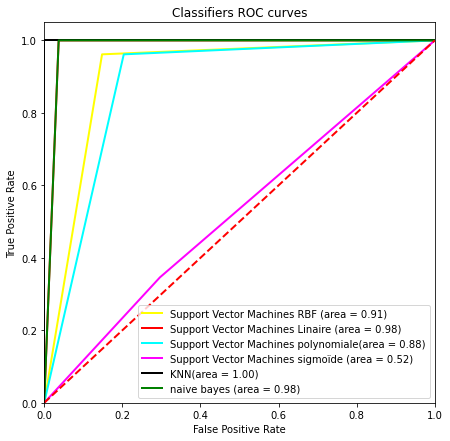

In [60]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc_1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc_2) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_svc_3)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_4) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_knn) 
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test, pred_naive_bayes) 
roc_auc6 = auc(fpr6, tpr6)

plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='Support Vector Machines RBF (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Support Vector Machines Linaire (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='Support Vector Machines polynomiale(area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Support Vector Machines sigmoïde (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='black', lw=2, label='KNN(area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='green', lw=2, label='naive bayes (area = %0.2f)'% roc_auc6)


plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

# SVM + selectKbest + ADABOOST #

In [61]:
from sklearn.ensemble import AdaBoostClassifier
svc=SVC(probability=True)
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,base_estimator=svc ,learning_rate=1, random_state=0)
# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_svc = model1.predict(X_test)
print(classification_report(y_pred_svc, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# naive bayes + selectKbest + ADABOOST  #

In [68]:
NB_clf=GaussianNB()

abc =AdaBoostClassifier(n_estimators=50, base_estimator=NB_clf,learning_rate=1)

model = abc.fit(X_train, y_train)

y_pred_NB_ada = model.predict(X_test)

print(classification_report(y_test, y_pred_NB_ada))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      1.00      0.98        26

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



# DecisionTree #

In [64]:
from sklearn.tree import DecisionTreeClassifier
hyperparameters = {
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.1, 0.01, 0.001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']}

decision_tree = DecisionTreeClassifier()

decision_tree_cv = GridSearchCV(estimator=decision_tree, param_grid=hyperparameters, cv=10, n_jobs=-1)

decision_tree_cv.fit(X_train, y_train)

decision_tree_cv.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2'}

In [66]:
decision_tree = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='log2', criterion="entropy")
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

